In [14]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

../InputData/zT_Rebin_12/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_12/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_12/pPb_SE_L0_Correlation_GMB_Ratio.root


In [15]:
print(zT_centers)
print(zT_widths)


[0.0571  0.0733  0.09405 0.1207  0.15495 0.1989  0.2553  0.3275  0.4205
 0.54    0.6935  0.89   ]
[0.0071  0.0091  0.01165 0.015   0.01925 0.0247  0.0317  0.0405  0.0525
 0.067   0.0865  0.11   ]


**root to numpy**

In [16]:
Corrs = ROOT_to_nparray()
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [17]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)
#Plot_UB_Subtraction(Corrs)

**Pedestal Subtraction**

[[0.00887834 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.00874482 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.00896625 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00846578 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00865317 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00825445
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.

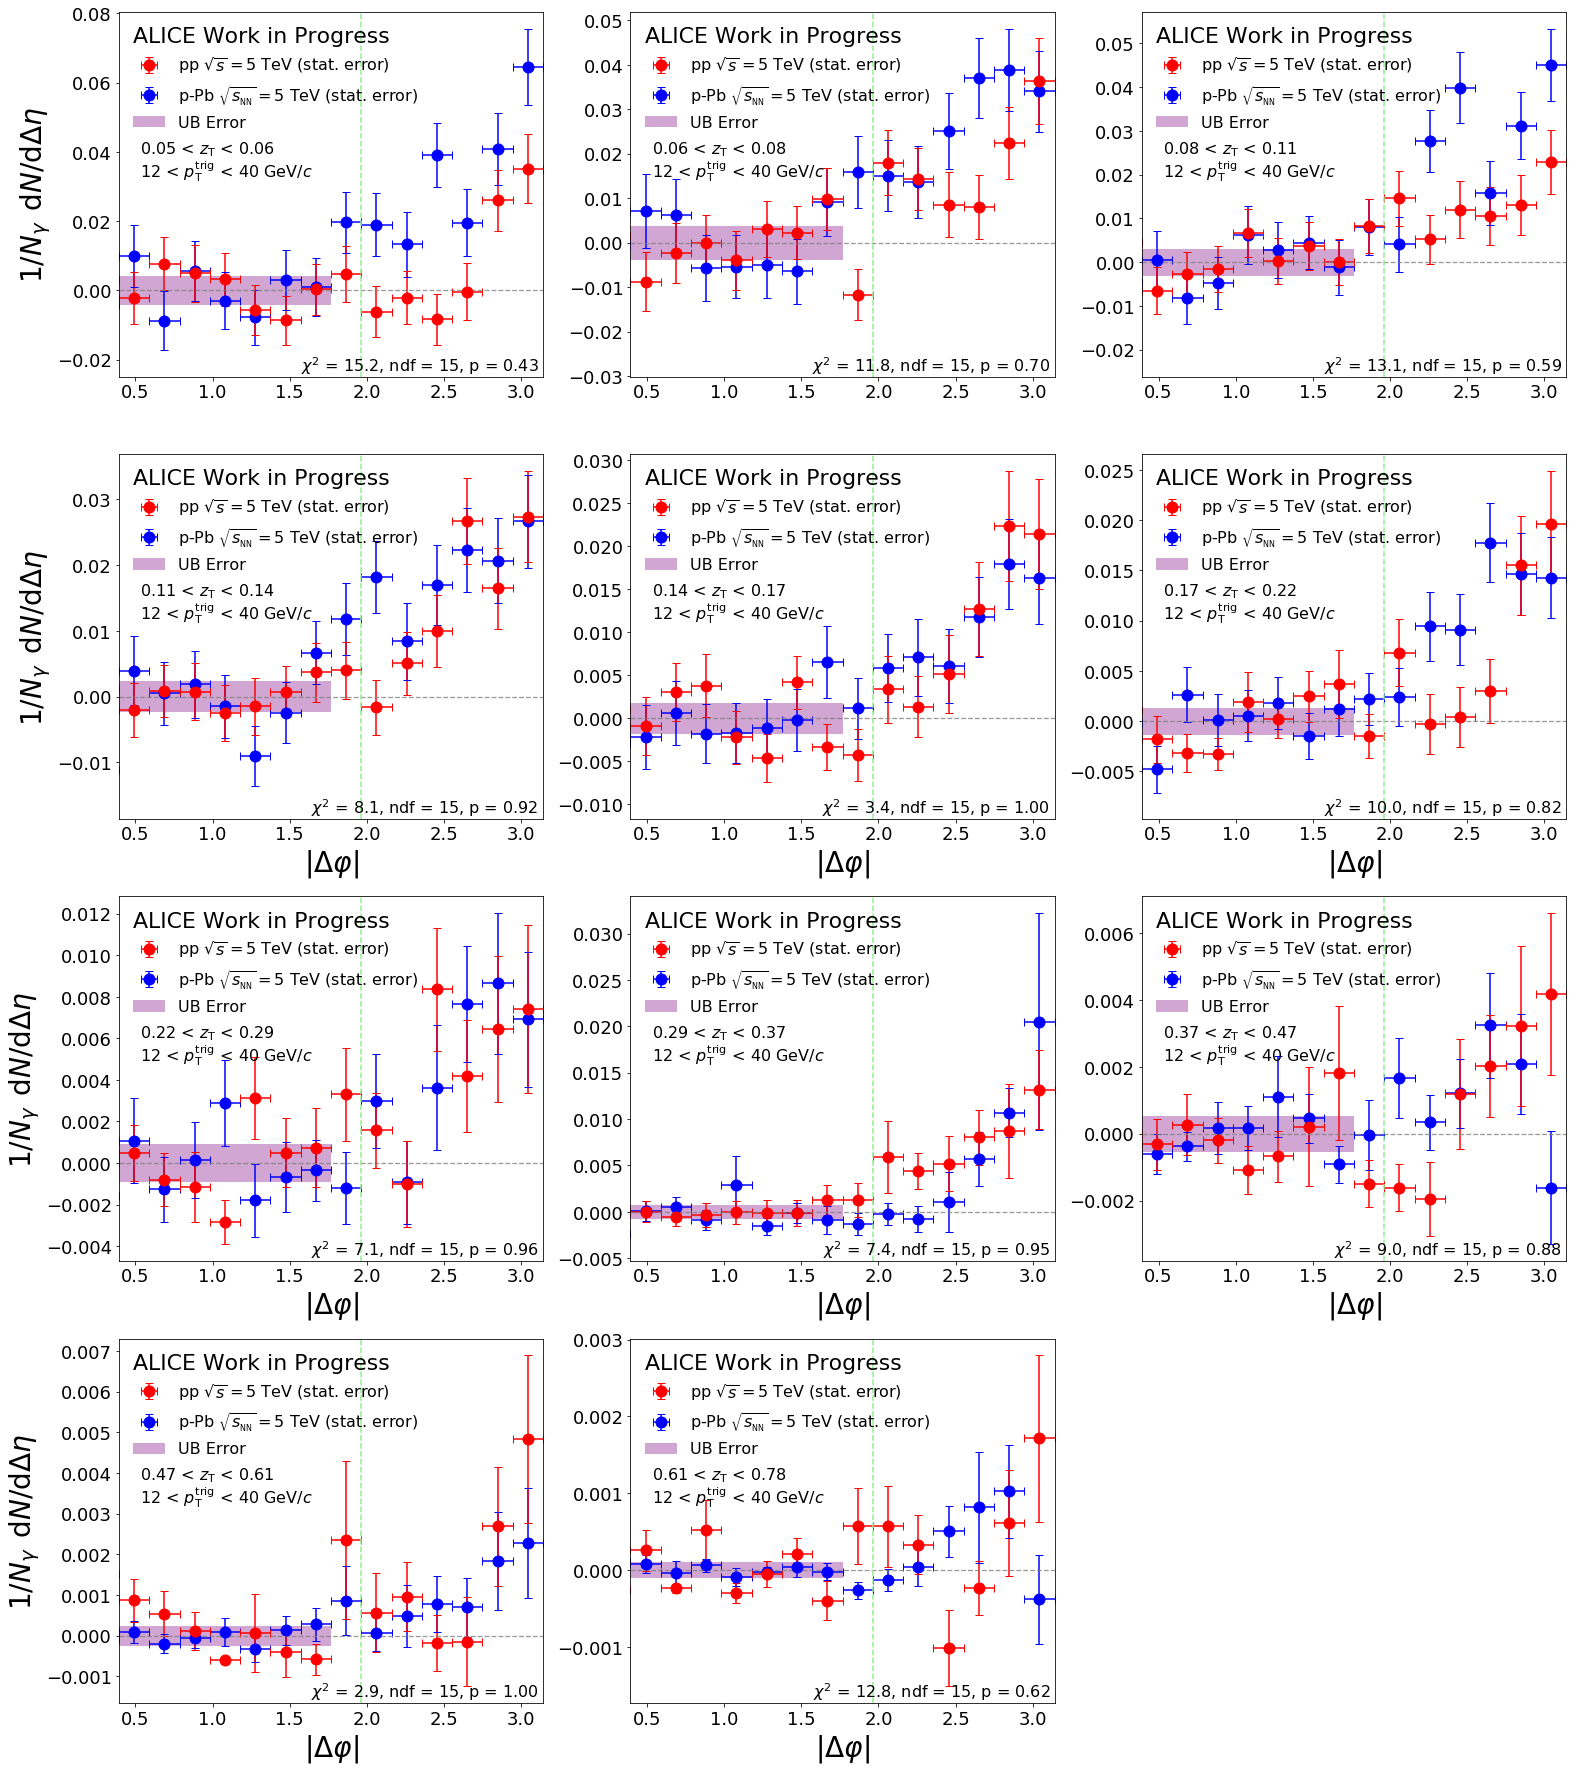

In [18]:
Ped_Sub_After_Cs(Corrs)
#print_from_Dict(Corrs)

Plot_pp_pPb_Cs(Corrs)
#Compare_Cs_pTBins()

**Debugging**

In [6]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][5])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][5][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][5][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][5][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)

Number of Away side bins = 6
[-0.00344584  0.00110556 -0.001821   -0.00320182 -0.00324836  0.00193064
  0.00022825  0.00245896  0.00365332 -0.00151287  0.00681796 -0.0002954
  0.00038555  0.00298899  0.015498    0.01957959]
pp
0.038176 +\- 0.008125 +\- 0.004716
0.2460774910812217
p-Pb
0.057400 +\- 0.007651 +\- 0.004929
0.1585568225231825


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

In [7]:
Avg_Corr = Cs_Weighted_Average(Corrs)
#Plot_pp_pPb_Cs(Avg_Corr)

In [8]:
Frags = Get_Fragmentation(Corrs)
#print(Frags["pp_FF_Errors"][0])
#print(Frags["pp_purity_FF_Errors"])
for i in range(len(Frags["pp_FF"][0])):
    print("%f"%(Frags["pp_FF_Errors"][0][i]/Frags["pp_FF"][0][i])),

0.598921 0.224231 0.256605 0.202801 0.219235 0.246077 0.299373 0.208764 0.720989 0.388502 0.837999 -1.878056


In [9]:
reload(functions_fragmentation)
from functions_fragmentation import *

zT_Rebin_12 Integrating 5\pi/8
pp: p = 2.24, chi2/dof = 3.90
[8.430268579058364, 4.822905898363218, 2.762183474457369, 1.5812002275143306, 0.9045185476758433, 0.5175353293460428, 0.2961578721650075, 0.1696984786136496, 0.09704008689889315, 0.0554703664498482, 0.031704077023921265]


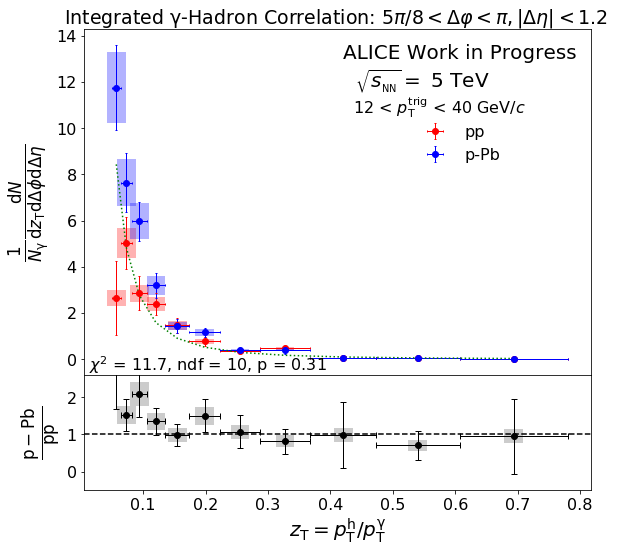

pp_purity_FF_Errors:
0.3204, 0.6067, 0.3450, 0.2868, 0.1765, 0.0933, 0.0436, 0.0574, 0.0069, 0.0067, 0.0012, -0.0001, 

p-Pb_FF_Errors:
1.8400, 1.2786, 0.8439, 0.5326, 0.3127, 0.1842, 0.1074, 0.1406, 0.0299, 0.0150, 0.0060, 0.0013, 

pp_FF:
2.6538, 5.0249, 2.8577, 2.3757, 1.4623, 0.7728, 0.3614, 0.4756, 0.0569, 0.0552, 0.0097, -0.0008, 

pp_FF_Errors:
1.5894, 1.1267, 0.7333, 0.4818, 0.3206, 0.1902, 0.1082, 0.0993, 0.0410, 0.0214, 0.0081, 0.0015, 

p-Pb_FF:
11.7564, 7.6439, 5.9660, 3.2011, 1.4304, 1.1619, 0.3870, 0.3872, 0.0560, 0.0388, 0.0092, -0.0017, 

p-Pb_purity_FF_Errors:
1.4194, 0.9229, 0.7203, 0.3865, 0.1727, 0.1403, 0.0467, 0.0468, 0.0068, 0.0047, 0.0011, -0.0002, 



In [10]:
Combined_Frags = Average_FF(Frags)
#Plot_pp_pPb_Avg_FF(Combined_Frags)

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
print_from_Dict(Frags)

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

In [11]:
reload(functions_fragmentation)
from functions_fragmentation import *

[0.95626524 0.81447648 0.68819568 0.58750936 0.52728913 0.52174036
 0.57245506 0.66671523 0.78906667 0.92846962 1.07833115 1.23484934
 1.39578664 1.55977576 1.72594701 1.89372606 2.0627206  2.23265465
 2.40332892 0.95626524]
0.865998866768


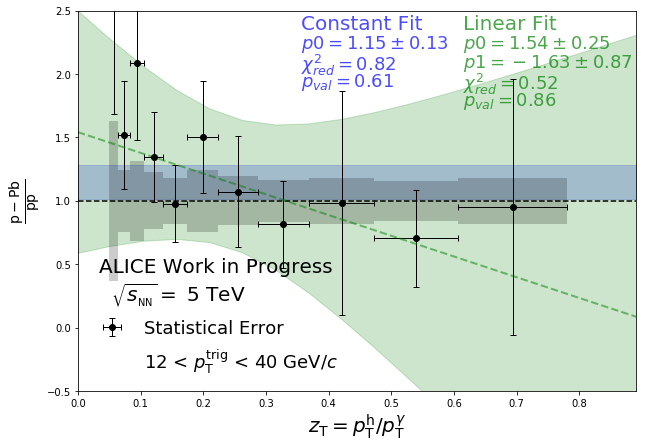

                Central Values:
[4.4300854  1.52119935 2.08765341 1.3474468  0.97819709 1.50357168
 1.07087776 0.81416927 0.98338092 0.70340323 0.95118809]

                Satistical Uncertainty Values:
[2.74236747 0.42555553 0.61169975 0.35345836 0.30284423 0.44014964
 0.43713755 0.34105584 0.88255435 0.38523776 1.00913078]

                Ratio Uncertainty from Purity:
[0.54830866 0.21978628 0.27946961 0.20258519 0.16888931 0.21801104
 0.17689473 0.15568636 0.16932754 0.14760779 0.1666254 ]

                Ratio Uncertainty from Single Track Efficiency:
[0.31325434 0.10756504 0.14761939 0.09527888 0.06916898 0.10631857
 0.07572249 0.05757046 0.06953553 0.04973812 0.06725915]

                Full Systematic Uncertainty:
[0.63148291 0.24469623 0.31606131 0.22387233 0.18250465 0.24255402
 0.19242048 0.16598976 0.18304919 0.15576245 0.17968811]


NameError: name 'Frags_Avg_Cs' is not defined


****************************************
Minimizer is Linear
Chi2                      =      8.24034
NDf                       =           10
p0                        =      1.14646   +/-   0.134558    

****************************************
Minimizer is Linear
Chi2                      =       4.6764
NDf                       =            9
p0                        =      1.54183   +/-   0.248933    
p1                        =     -1.63487   +/-   0.865999    


In [12]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

###### Compare Different Binning

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE","pT_Rebin_3_ErrWeights","pT_Rebin_4_ErrWeights"]
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)